<a href="https://colab.research.google.com/github/mittalmeghna/projects/blob/master/Breast_Cancer_Detection_MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Detection

### You belong to the data team at a local research hospital. You've been tasked with developing a means to help doctors diagnose breast cancer. You've been given data about biopsied breast cells; where it is benign (not harmful) or malignant (cancerous).  

1. What features of a cell are the largest drivers of malignancy?
2.  How would a physician use your product?
3. There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-effective method of detecting malignancy?


# Step 1: Frame The Problem

Classify the biopsed cells as benign or malignant using cost effective and explanable classification algorithm. Also, provide the actionable insights for the physician to use the information from your model.

# Step 2: Obtain the Data

###Import the libraries

In [0]:
!pip install missingno as ms

  ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline


In [0]:
data = pd.read_csv('breast-cancer-wisconsin.csv')


## Load/view the data

In [0]:
data.head()

,Index,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,1241035,7,8,3,7,4,5,7,8,2,4
1,1,1107684,6,10,5,5,4,10,6,10,1,4
2,2,691628,8,6,4,10,10,1,3,5,1,4
3,3,1226612,7,5,6,3,3,8,7,4,1,4
4,4,1142706,5,10,10,10,6,10,6,5,2,4


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15855 non-null int64
ID                             15855 non-null int64
Clump Thickness                15855 non-null int64
Uniformity of Cell Size        15827 non-null object
Uniformity of Cell Shape       15827 non-null object
Marginal Adhesion              15827 non-null object
Single Epithelial Cell Size    15827 non-null object
Bare Nuclei                    15827 non-null object
Bland Chromatin                15827 non-null object
Normal Nucleoli                15827 non-null object
Mitoses                        15827 non-null object
Class                          15827 non-null object
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


### Data INFO: 
Data Contains 11 columns and one of them is patient's ID and one of them is the target variable - "Class". The rest of the 9 columns are features which includes:
1. Clump thickness
2. Uniformity of Cell size
3. Uniformity of Cell Shape
4. Marginal Ahesion
5. Single Epithelial Cell Size
6. Bare Nuclei
7. Bland Chromatin
8. Normal Nucleoli
9. Mitoses


In [0]:
data.isnull().sum()

Index                           0
ID                              0
Clump Thickness                 0
Uniformity of Cell Size        28
Uniformity of Cell Shape       28
Marginal Adhesion              28
Single Epithelial Cell Size    28
Bare Nuclei                    28
Bland Chromatin                28
Normal Nucleoli                28
Mitoses                        28
Class                          28
dtype: int64

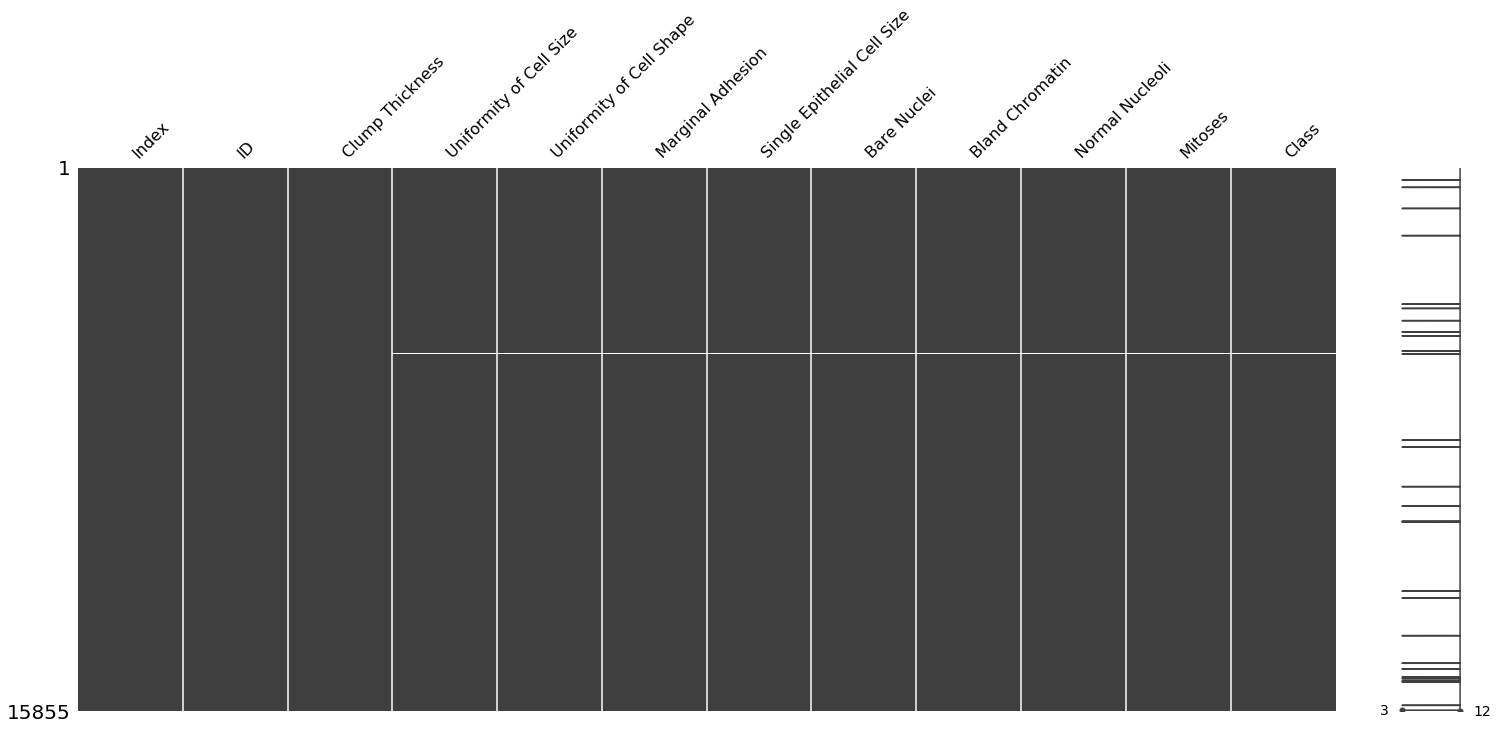

In [0]:
ms.matrix(data)

### Data Insights1: It seems that the data has NAN values in most of the columns except ID and clump thickness

*  Data has combination of null values and also has non-numerical values which would need to be taken care of. 

*  Columns except ID and Clump thickness have 28 null values and categorial variables. 



### DATA CLEANING

In [0]:
data.dropna(inplace = True) # It is ok to drop null values as they are pretty small in number compared to the data size. Although, I wonder if t

#### NOTE: Come back and try what are the corresponding class value for the null values. Do they belong to the minority class?

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15827 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15827 non-null int64
ID                             15827 non-null int64
Clump Thickness                15827 non-null int64
Uniformity of Cell Size        15827 non-null object
Uniformity of Cell Shape       15827 non-null object
Marginal Adhesion              15827 non-null object
Single Epithelial Cell Size    15827 non-null object
Bare Nuclei                    15827 non-null object
Bland Chromatin                15827 non-null object
Normal Nucleoli                15827 non-null object
Mitoses                        15827 non-null object
Class                          15827 non-null object
dtypes: int64(3), object(9)
memory usage: 1.6+ MB


In [0]:
data.drop("Index", axis = 1) #dropna introduced extra index column - dropping it here!

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4
5,601265,10,4,4,6,2,10,2,3,1,4
6,378275,10,9,7,3,4,2,7,7,1,4
7,1142706,5,10,10,10,6,10,6,5,2,4
8,601265,10,4,4,6,2,10,2,3,1,4
9,1226612,7,5,6,3,3,8,7,4,1,4


In [0]:
data.columns

Index(['Index', 'ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [0]:
print("The unique values in column Uniformity of Cell Size are :", set(data["Uniformity of Cell Size"]))
print("The unique values in column Uniformity of Cell Shape are :", set(data["Uniformity of Cell Shape"]))
print("The unique values in column Marginal Adhesion are :", set(data["Marginal Adhesion"]))
print("The unique values in column Single Epithelial Cell Size are :", set(data["Single Epithelial Cell Size"]))
print("The unique values in column Bare Nuclei are :", set(data["Bare Nuclei"]))
print("The unique values in column Bland Chromatin are :", set(data["Bland Chromatin"]))
print("The unique values in column Normal Nucleoli are :", set(data["Normal Nucleoli"]))
print("The unique values in column Mitoses are :", set(data["Mitoses"]))
print("The unique values in column Class are :", set(data["Class"]))

The unique values in column Uniformity of Cell Size are : {'90', '6', '30', '10', '#', '20', '?', '9', '4', '40', '80', '1', '5', '8', '2', 'No idea', '3', '7', '100', '60', '50'}
The unique values in column Uniformity of Cell Shape are : {'70', '?', '6', '5', '9', '4', '2', 'No idea', '3', '40', '8', '#', '30', '7', '60', '50', '10', '100', '1'}
The unique values in column Marginal Adhesion are : {'70', '20', '?', '6', '5', '9', '4', '2', 'No idea', '3', '30', '8', '#', '60', '7', '40', '50', '10', '100', '1'}
The unique values in column Single Epithelial Cell Size are : {'20', '?', '6', '5', '9', '2', '4', '8', '3', 'No idea', '30', '#', '60', '7', '40', '80', '10', '100', '1'}
The unique values in column Bare Nuclei are : {'20', '?', '6', '50', '5', '9', '2', '8', 'No idea', '3', '30', '4', '#', '7', '60', '80', '10', '100', '1'}
The unique values in column Bland Chromatin are : {'70', '20', '?', '6', '5', '9', '4', '2', 'No idea', '3', '30', '8', '#', '60', '7', '40', '50', '10', '

### Note: This shows that there are three strings other than numbers and also there are number outside the expected range as well. 

In [0]:
print("Number of values = No Idea in Uniformity of Cell size :", len(data.loc[data["Uniformity of Cell Size"] == "No idea"]))
print("Number of values = No Idea in Uniformity of Cell Shape :", len(data.loc[data["Uniformity of Cell Shape"] == "No idea"]))
print("Number of values = No Idea in Marginal Adhesion :", len(data.loc[data["Marginal Adhesion"] == "No idea"]))
print("Number of values = No Idea in in column Single Epithelial Cell Size are :", len(data.loc[data["Single Epithelial Cell Size"] == "No idea"]))
print("Number of values = No Idea in Bare Nuclei :", len(data.loc[data["Bare Nuclei"] == "No idea"]))
print("Number of values = No Idea in Bland Chromatin :", len(data.loc[data["Bland Chromatin"] == "No idea"]))
print("Number of values = No Idea in Normal Nucleoli :", len(data.loc[data["Normal Nucleoli"] == "No idea"]))
print("Number of values = No Idea in Mitoses :", len(data.loc[data["Mitoses"] == "No idea"]))
print("Number of values = No Idea in Class :", len(data.loc[data["Class"] == "No idea"]))

Number of values = No Idea in Uniformity of Cell size : 17
Number of values = No Idea in Uniformity of Cell Shape : 17
Number of values = No Idea in Marginal Adhesion : 17
Number of values = No Idea in in column Single Epithelial Cell Size are : 17
Number of values = No Idea in Bare Nuclei : 17
Number of values = No Idea in Bland Chromatin : 17
Number of values = No Idea in Normal Nucleoli : 17
Number of values = No Idea in Mitoses : 17
Number of values = No Idea in Class : 17


In [0]:
print("Number of values = ? in Uniformity of Cell size :", len(data.loc[data["Uniformity of Cell Size"] == "?"]))
print("Number of values= ? in Uniformity of Cell Shape :", len(data.loc[data["Uniformity of Cell Shape"] == "?"]))
print("Number of values = ? in Marginal Adhesion :", len(data.loc[data["Marginal Adhesion"] == "?"]))
print("Number of values = ? in Single Epithelial Cell Size :", len(data.loc[data["Single Epithelial Cell Size"] == "?"]))
print("Number of values = ? in Bare Nuclei :", len(data.loc[data["Bare Nuclei"] == "?"]))
print("Number of values = ? in Bland Chromatin :", len(data.loc[data["Bland Chromatin"] == "?"]))
print("Number of values = ? in Normal Nucleoli :", len(data.loc[data["Normal Nucleoli"] == "?"]))
print("Number of values= ? in Mitoses :", len(data.loc[data["Mitoses"] == "?"]))
print("Number of values= ?  in Class :", len(data.loc[data["Class"] == "?"]))

Number of values = ? in Uniformity of Cell size : 23
Number of values= ? in Uniformity of Cell Shape : 23
Number of values = ? in Marginal Adhesion : 23
Number of values = ? in Single Epithelial Cell Size : 23
Number of values = ? in Bare Nuclei : 39
Number of values = ? in Bland Chromatin : 23
Number of values = ? in Normal Nucleoli : 23
Number of values= ? in Mitoses : 23
Number of values= ?  in Class : 23


In [0]:
print("Number of values = # in Uniformity of Cell size :", len(data.loc[data["Uniformity of Cell Size"] == "#"]))
print("Number of values = #  in Uniformity of Cell Shape :", len(data.loc[data["Uniformity of Cell Shape"] == "#"]))
print("Number of values = #  in Marginal Adhesion :", len(data.loc[data["Marginal Adhesion"] == "#"]))
print("Number of values = #  in Single Epithelial Cell Size :", len(data.loc[data["Single Epithelial Cell Size"] == "#"]))
print("Number of values = #  in Bare Nuclei :", len(data.loc[data["Bare Nuclei"] == "#"]))
print("Number of values = #  in Bland Chromatin :", len(data.loc[data["Bland Chromatin"] == "#"]))
print("Number of values = #  in Normal Nucleoli :", len(data.loc[data["Normal Nucleoli"] == "#"]))
print("Number of values = #  in Mitoses :", len(data.loc[data["Mitoses"] == "#"]))
print("Number of values = #  in Class :", len(data.loc[data["Class"] == "#"]))

Number of values = # in Uniformity of Cell size : 11
Number of values = #  in Uniformity of Cell Shape : 11
Number of values = #  in Marginal Adhesion : 11
Number of values = #  in Single Epithelial Cell Size : 11
Number of values = #  in Bare Nuclei : 11
Number of values = #  in Bland Chromatin : 11
Number of values = #  in Normal Nucleoli : 11
Number of values = #  in Mitoses : 11
Number of values = #  in Class : 11


In [0]:
#Cleaning column 4
data["Uniformity of Cell Size"] = data["Uniformity of Cell Size"].apply(lambda x: x.replace("#", "NAN").replace("?", "NAN").replace("No idea", "NAN"))
#Cleaning column 5
data["Uniformity of Cell Shape"] = data["Uniformity of Cell Shape"].apply(lambda x: x.replace("#", "NAN").replace("?", "NAN").replace("No idea", "NAN"))
#Cleaning column 6
data["Marginal Adhesion"] = data["Marginal Adhesion"].apply(lambda x: x.replace("#", "NAN").replace("?", "NAN").replace("No idea", "NAN"))
#Cleaning column 7
data["Single Epithelial Cell Size"] = data["Single Epithelial Cell Size"].apply(lambda x: x.replace("#", "NAN").replace("?", "NAN").replace("No idea", "NAN"))
#Cleaning column 8
data["Bare Nuclei"] = data["Bare Nuclei"].apply(lambda x: x.replace("#", "NAN").replace("?", "NAN").replace("No idea", "NAN"))
#Cleaning column 9
data["Bland Chromatin"] = data["Bland Chromatin"].apply(lambda x: x.replace("#", "NAN").replace("?", "NAN").replace("No idea", "NAN"))
#Cleaning column 10
data["Normal Nucleoli"] = data["Normal Nucleoli"].apply(lambda x: x.replace("#", "NAN").replace("?", "NAN").replace("No idea", "NAN"))
#Cleaning column 11
data["Mitoses"] = data["Mitoses"].apply(lambda x: x.replace("#", "NAN").replace("?", "NAN").replace("No idea", "NAN"))
#Cleaning column 12
data["Class"] = data["Class"].apply(lambda x: x.replace("#", "NAN").replace("?", "NAN").replace("No idea", "NAN"))


In [0]:
(data == "NAN").sum(axis = 0)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Index                           0
ID                              0
Clump Thickness                 0
Uniformity of Cell Size        51
Uniformity of Cell Shape       51
Marginal Adhesion              51
Single Epithelial Cell Size    51
Bare Nuclei                    67
Bland Chromatin                51
Normal Nucleoli                51
Mitoses                        51
Class                          51
dtype: int64

### Note: This shows that there are atmost 67 NAN values in total which includes strings of "?", "#", "No idea" unless they are all independently recorded in separate row. May come back to verify it later.

In [0]:
data = data.loc[data["Uniformity of Cell Size"] != "NAN"]


In [0]:
data = data.loc[data["Uniformity of Cell Shape"] != "NAN"]
data = data.loc[data["Marginal Adhesion"] != "NAN"]
data = data.loc[data["Single Epithelial Cell Size"] != "NAN"]
data = data.loc[data["Bare Nuclei"] != "NAN"]
data = data.loc[data["Bland Chromatin"] != "NAN"]
data = data.loc[data["Normal Nucleoli"] != "NAN"]
data = data.loc[data["Mitoses"] != "NAN"]
data = data.loc[data["Class"] != "NAN"]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15760 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15760 non-null int64
ID                             15760 non-null int64
Clump Thickness                15760 non-null int64
Uniformity of Cell Size        15760 non-null object
Uniformity of Cell Shape       15760 non-null object
Marginal Adhesion              15760 non-null object
Single Epithelial Cell Size    15760 non-null object
Bare Nuclei                    15760 non-null object
Bland Chromatin                15760 non-null object
Normal Nucleoli                15760 non-null object
Mitoses                        15760 non-null object
Class                          15760 non-null object
dtypes: int64(3), object(9)
memory usage: 1.6+ MB


In [0]:
#Function to convert string to integer
def str_int(row):
    if type(row) == str:
      row = int(row)
    return row


In [0]:
#Convert each numeric string value to integer
data["Uniformity of Cell Size"] = data["Uniformity of Cell Size"].apply(lambda row : str_int(row))
data["Uniformity of Cell Shape"] = data["Uniformity of Cell Shape"].apply(lambda row : str_int(row))
data["Marginal Adhesion"] = data["Marginal Adhesion"].apply(lambda row : str_int(row))
data["Single Epithelial Cell Size"] = data["Single Epithelial Cell Size"].apply(lambda row : str_int(row))
data["Bare Nuclei"] = data["Bare Nuclei"].apply(lambda row : str_int(row))
data["Bland Chromatin"] = data["Bland Chromatin"].apply(lambda row : str_int(row))
data["Normal Nucleoli"] = data["Normal Nucleoli"].apply(lambda row : str_int(row))
data["Mitoses"] = data["Mitoses"].apply(lambda row : str_int(row))
data["Class"] = data["Class"].apply(lambda row : str_int(row))


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15760 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15760 non-null int64
ID                             15760 non-null int64
Clump Thickness                15760 non-null int64
Uniformity of Cell Size        15760 non-null int64
Uniformity of Cell Shape       15760 non-null int64
Marginal Adhesion              15760 non-null int64
Single Epithelial Cell Size    15760 non-null int64
Bare Nuclei                    15760 non-null int64
Bland Chromatin                15760 non-null int64
Normal Nucleoli                15760 non-null int64
Mitoses                        15760 non-null int64
Class                          15760 non-null int64
dtypes: int64(12)
memory usage: 1.6 MB


In [0]:
print("Number of values outside the expected range in Uniformity of Cell size :", data["Uniformity of Cell Size"].apply(lambda x: x > 10).sum())
print("Number of values outside the expected range in Uniformity of Cell Shape :", data["Uniformity of Cell Shape"].apply(lambda x: x >10).sum())
print("Number of values outside the expected range in Marginal Adhesion :", data["Marginal Adhesion"].apply(lambda x: x > 10).sum())
print("Number of values outside the expected range in Single Epithelial Cell Size :", data["Single Epithelial Cell Size"].apply(lambda x:  x > 10).sum())
print("Number of values outside the expected range in Bare Nuclei :", data["Bare Nuclei"].apply(lambda x:  x > 10).sum())
print("Number of values outside the expected range in Bland Chromatin :", data["Bland Chromatin"].apply(lambda x:  x > 10).sum())
print("Number of values outside the expected range in Normal Nucleoli :", data["Normal Nucleoli"].apply(lambda x:  x > 10).sum())
print("Number of values outside the expected range in Mitoses :", data["Mitoses"].apply(lambda x:  x > 10).sum())
print("Number of values outside the expected range in Class :", data["Class"].apply(lambda x: x not in [2, 4]).sum())


Number of values outside the expected range in Uniformity of Cell size : 153
Number of values outside the expected range in Uniformity of Cell Shape : 152
Number of values outside the expected range in Marginal Adhesion : 146
Number of values outside the expected range in Single Epithelial Cell Size : 156
Number of values outside the expected range in Bare Nuclei : 139
Number of values outside the expected range in Bland Chromatin : 155
Number of values outside the expected range in Normal Nucleoli : 135
Number of values outside the expected range in Mitoses : 52
Number of values outside the expected range in Class : 156


In [0]:
data.drop(data[data["Uniformity of Cell Size"] > 10].index, inplace = True)


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15607 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15607 non-null int64
ID                             15607 non-null int64
Clump Thickness                15607 non-null int64
Uniformity of Cell Size        15607 non-null int64
Uniformity of Cell Shape       15607 non-null int64
Marginal Adhesion              15607 non-null int64
Single Epithelial Cell Size    15607 non-null int64
Bare Nuclei                    15607 non-null int64
Bland Chromatin                15607 non-null int64
Normal Nucleoli                15607 non-null int64
Mitoses                        15607 non-null int64
Class                          15607 non-null int64
dtypes: int64(12)
memory usage: 1.5 MB


In [0]:
data.drop(data[data["Uniformity of Cell Shape"] > 10].index, inplace = True)

In [0]:
data.drop(data[data["Marginal Adhesion"] > 10].index, inplace = True)
data.drop(data[data["Single Epithelial Cell Size"] > 10].index, inplace = True)
data.drop(data[data["Bare Nuclei"] > 10].index, inplace = True)
data.drop(data[data["Bland Chromatin"] > 10].index, inplace = True)
data.drop(data[data["Normal Nucleoli"] > 10].index, inplace = True)
data.drop(data[data["Mitoses"] > 10].index, inplace = True)

In [0]:
data["Class"].apply(lambda x: x not in [2, 4]).sum() # the values for these are already taken care of

0

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15604 entries, 0 to 15854
Data columns (total 12 columns):
Index                          15604 non-null int64
ID                             15604 non-null int64
Clump Thickness                15604 non-null int64
Uniformity of Cell Size        15604 non-null int64
Uniformity of Cell Shape       15604 non-null int64
Marginal Adhesion              15604 non-null int64
Single Epithelial Cell Size    15604 non-null int64
Bare Nuclei                    15604 non-null int64
Bland Chromatin                15604 non-null int64
Normal Nucleoli                15604 non-null int64
Mitoses                        15604 non-null int64
Class                          15604 non-null int64
dtypes: int64(12)
memory usage: 1.5 MB


### NOTE: Finally we have a dataset with 15604 observations with values within the expected range [1, 10] and all the data values are numerical. 




### Remove Duplicate Records



In [0]:
data["ID"].nunique()

628

In [0]:
data.drop("Index", axis = 1, inplace = True)


In [0]:
data.drop_duplicates(subset = list(data.columns), inplace = True)


In [0]:
data.shape

(672, 11)

In [0]:
data.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4


### Data Insight 3:  There are only 628 unique patients and only  672  unique patient records.

# Step 3: Analyze/Visualize the Data

Number of Benign:  437
Number of Malignant:  235


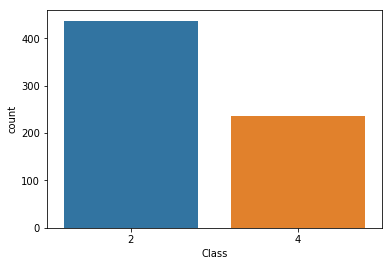

In [0]:
ax = sns.countplot(data["Class"],label="Count")       
B, M = data["Class"].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant: ',M)

### Note: This shows that there are about 437 Benign records and 235 Malignant records. This aligns with our intuition of seeing more benign cases than malignant in our dataset.


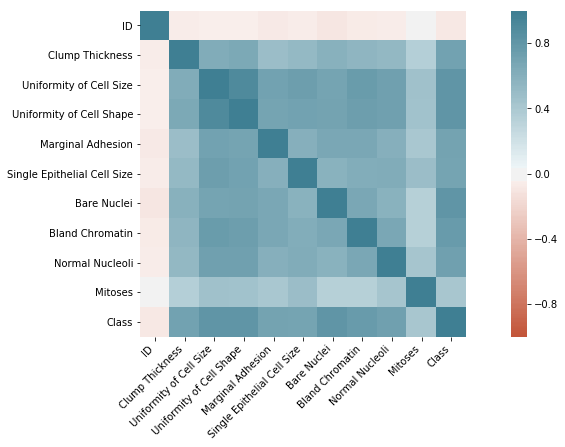

In [0]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df_cancer.corr(), annot=True)

In [0]:
data.corr()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,1.000000,-0.061072,-0.044324,-0.044098,-0.072617,-0.052607,-0.099171,-0.063052,-0.054012,-0.039032,-0.084835
Clump Thickness,-0.061072,1.000000,0.639223,0.651070,0.486514,0.516415,0.592251,0.553307,0.531452,0.352753,0.715084
Uniformity of Cell Size,-0.044324,0.639223,1.000000,0.904889,0.711914,0.746347,0.687707,0.757267,0.721212,0.464827,0.820048
Uniformity of Cell Shape,-0.044098,0.651070,0.904889,1.000000,0.691022,0.714236,0.708815,0.735428,0.720686,0.445638,0.820085
Marginal Adhesion,-0.072617,0.486514,0.711914,0.691022,1.000000,0.598669,0.674115,0.668285,0.598289,0.421329,0.709798
Single Epithelial Cell Size,-0.052607,0.516415,0.746347,0.714236,0.598669,1.000000,0.579609,0.617855,0.630113,0.489009,0.688764
Bare Nuclei,-0.099171,0.592251,0.687707,0.708815,0.674115,0.579609,1.000000,0.677055,0.585019,0.341130,0.819718
Bland Chromatin,-0.063052,0.553307,0.757267,0.735428,0.668285,0.617855,0.677055,1.000000,0.665610,0.348672,0.757816
Normal Nucleoli,-0.054012,0.531452,0.721212,0.720686,0.598289,0.630113,0.585019,0.665610,1.000000,0.435714,0.720845
Mitoses,-0.039032,0.352753,0.464827,0.445638,0.421329,0.489009,0.341130,0.348672,0.435714,1.000000,0.425387


### Data Insights 2: Watch out for the following correlated variable while modeling. 

1. All variables are positively correlated. No negative correlation with the given feature set. 
2. Except Clump thickness and Mitoses, most variable seems highly positively correlated.
3.   "Uniformity of Cell Size" and "Uniformity of Cell Shape" seems to be highly correlated with a value of 0.64
4..   "Uniformity of Cell Size" and "Bland Chromatin" seems to be highly correlated with a value of 0.76



---



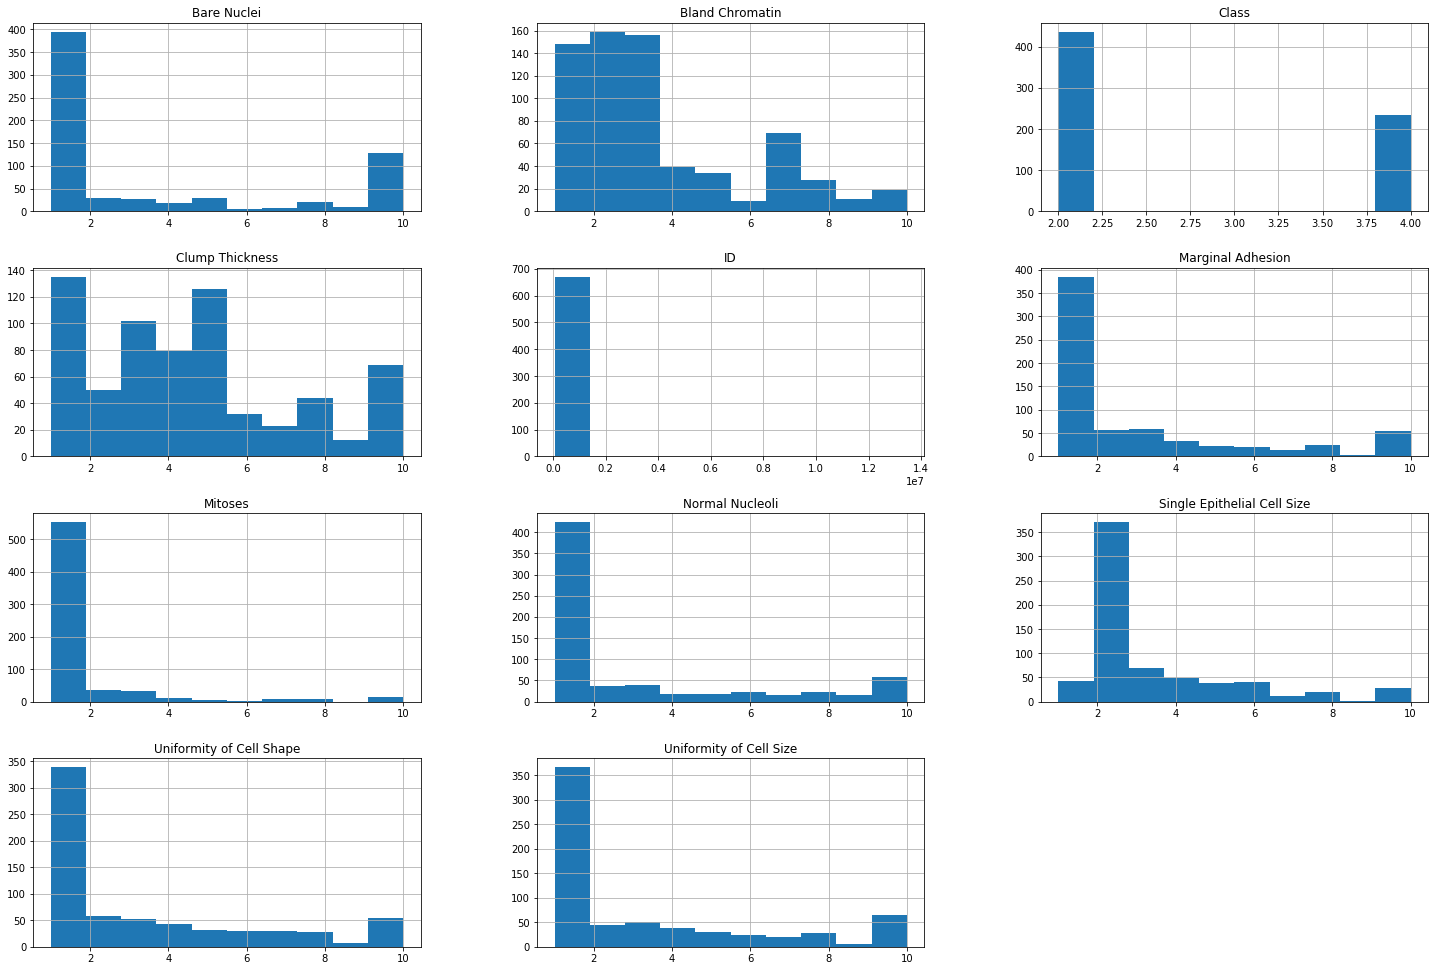

In [0]:
#Look at the distribution of all the features individually
data.hist(bins=10, figsize=(25,17))
plt.show()

In [0]:
target = data["Class"]
features = data.drop(["Class", "ID"], axis = 1)


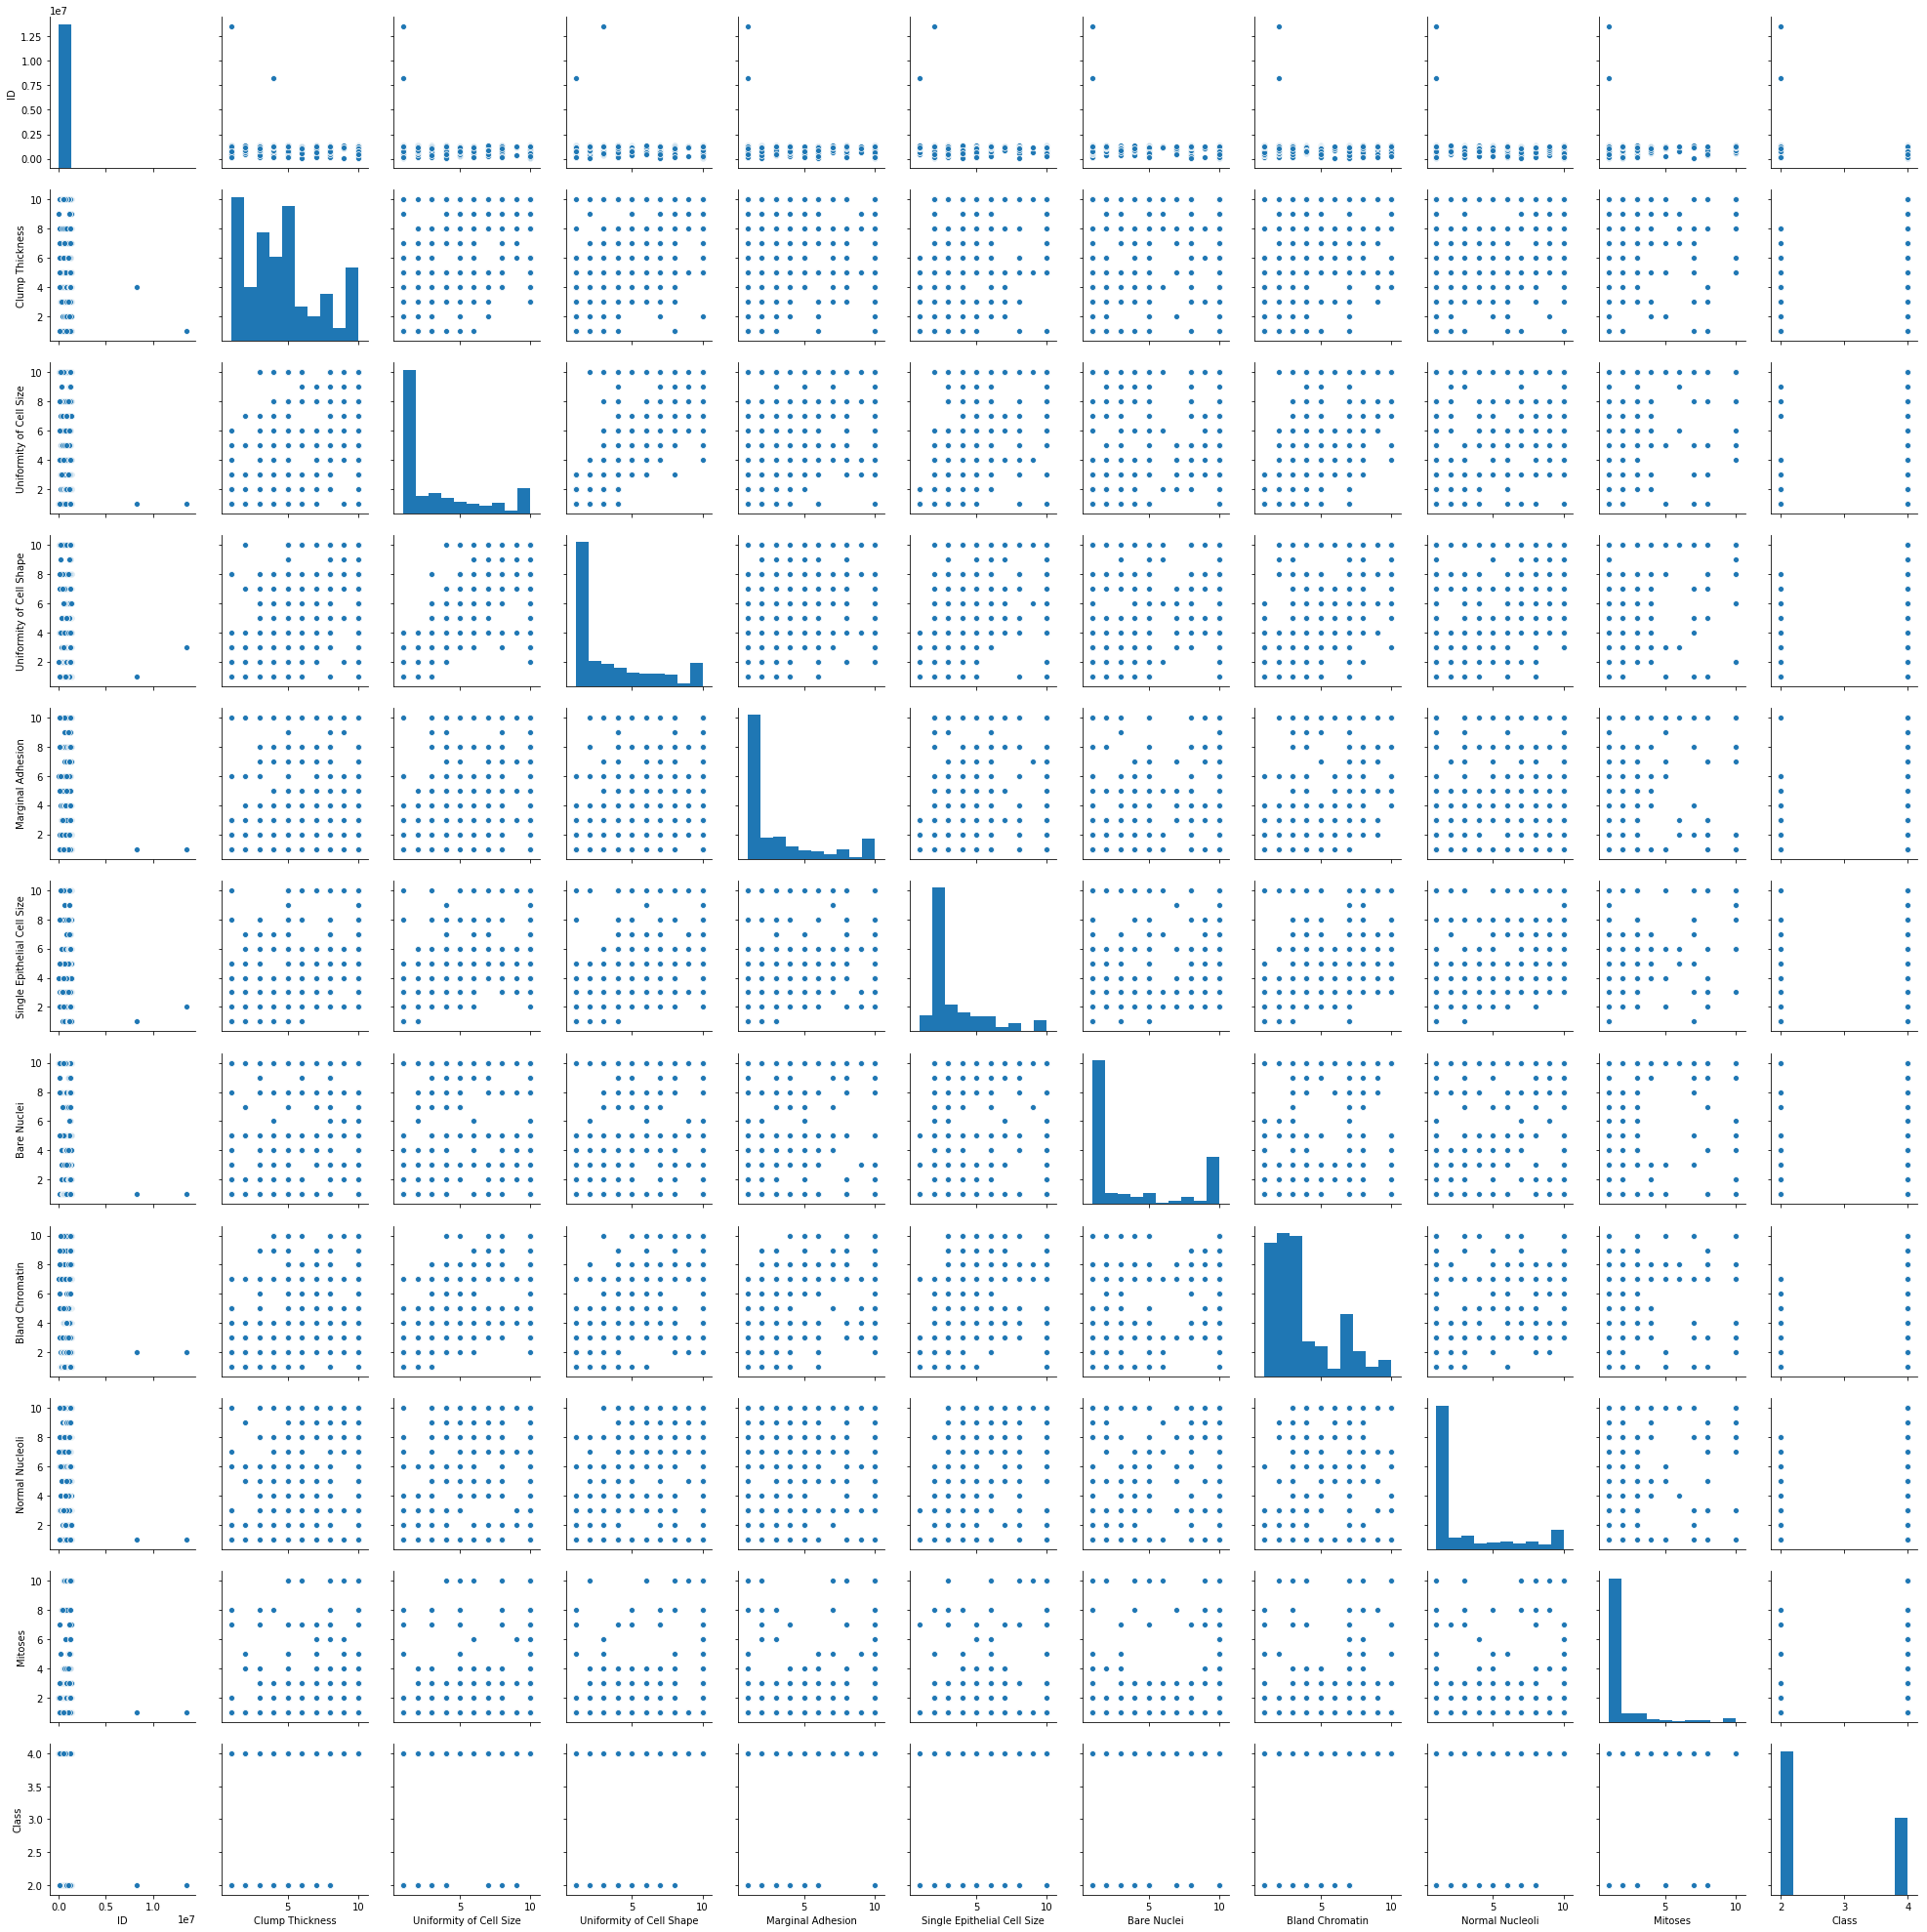

In [0]:
sns.pairplot(data)
# sns.plt.show()


In [0]:
X = data.drop(["ID", "Class"] ,axis=1)
y = data.filter(['Class'])
X.shape
y.shape

(672, 1)

Text(0.5, 1.0, 'whitegrid')

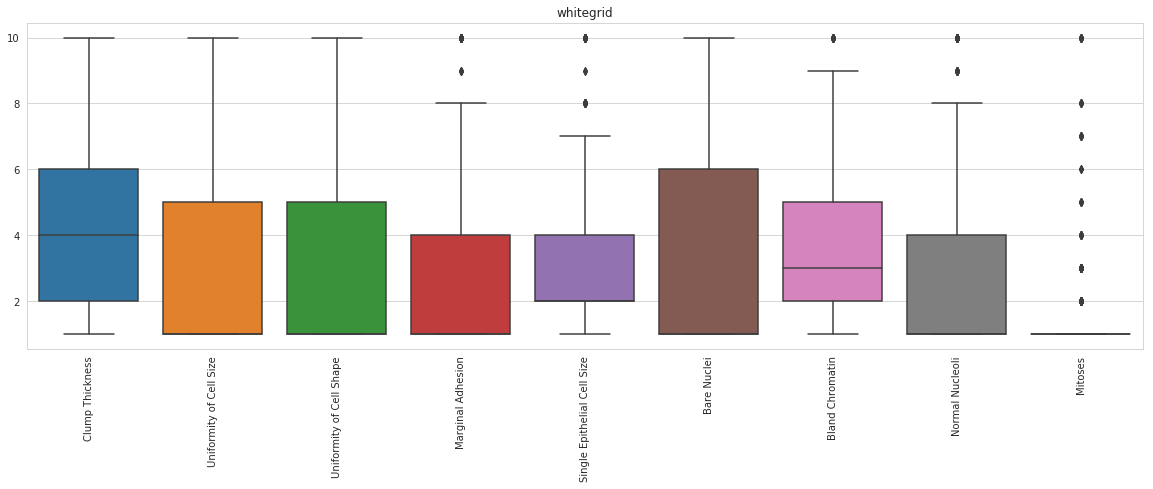

In [0]:
plt.figure(figsize = (20, 6))
sns.set_style("whitegrid")
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("whitegrid")


In [0]:
https://www.kaggle.com/fredzanella/detect-100-tumors-a-machine-learning-project
https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

# # Boxplots;
# # columns to use
# cols_to_plot = ['Index', 'ID', 'Clump Thickness', 'Uniformity of Cell Size',
#        'Uniformity of Cell Shape', 'Marginal Adhesion',
#        'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
#        'Normal Nucleoli', 'Mitoses']

# # make boxplots
# for ci in cols_to_plot:
#     plt.figure();
#     dat.boxplot(by='Class',column=ci);
#     plt.ylabel(ci);
    
    
    
# # Correlaiton matrix to check for colinearity, and potential useful features?
# corr = dat.corr()
# corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(4)

# Based on the boxplots, lots of features look related to malignancy. Here I'll use logistic regression to quantify the relationship.
from sklearn.linear_model import LogisticRegression

# structure data for the logistic regression
X = [i for i in dat.columns if i not in ['Index','ID','Class']]
X = dat[X]
y = dat['Class']

# initialize, fit the logistic regression model
logreg = LogisticRegression(random_state=0,solver='lbfgs')
logreg.fit(X,y)


import statsmodels.api as sm
logit_model=sm.Logit(y==4,X)
result=logit_model.fit()
print(result.summary2())


# DO A TRAIN-TEST SPLIT AND APPLY SMOTE for class imbalance
from sklearn.model_selection import train_test_split
​
# copied from above;
X = [i for i in dat.columns if i not in ['Index','ID','Class']]
X = dat[X]
y = dat['Class']
​
# stratified train-test split; 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0,stratify=y)


# train classifier on training data
from imblearn.over_sampling import SMOTE
​
# SMOTE to address class imbalance;
X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_train, y_train)
​
# initialize classification model
logreg = LogisticRegression(random_state=0,solver='lbfgs')
​
# fit model to SMOTE balanced data
logreg.fit(X_train_SMOTE,y_train_SMOTE);

# precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# get precision and recall
y_scores = logreg.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores,pos_label=4)

# get average precision
average_precision = average_precision_score(y_test, y_scores,pos_label=4)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
#step_kwargs = ({'step': 'post'}
#               if 'step' in signature(plt.fill_between).parameters
#               else {})
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')#, **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))


# ROC curve -- TDR, FDR? 
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


fpr, tpr,_ = roc_curve(y_test, y_scores,pos_label=4)
roc_auc = auc(fpr, tpr)


# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores,pos_label=4)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, 'whitegrid')

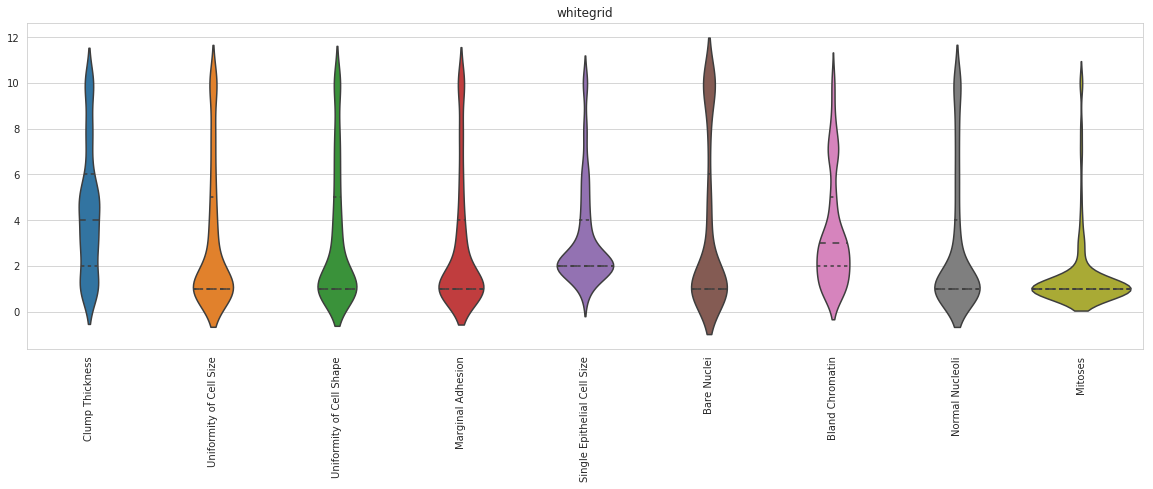

In [0]:
plt.figure(figsize = (20, 6))
sns.set_style("whitegrid")
sns.violinplot(data = X, inner= "quart")
plt.xticks(rotation=90)
plt.title("whitegrid")

In [0]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


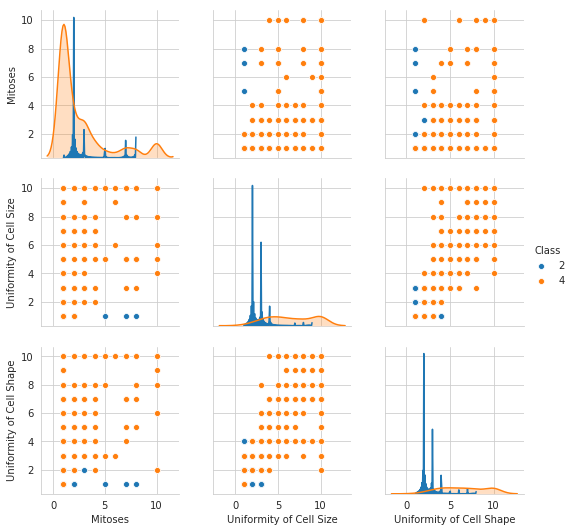

In [0]:
sns.pairplot(data, hue = 'Class', vars = ['Mitoses', 'Uniformity of Cell Size', 'Uniformity of Cell Shape'] )

In [0]:
plt.figure(figsize=(10,10))
sns.violinplot(data, y = 'Class', vars = ['Mitoses', 'Uniformity of Cell Size', 'Uniformity of Cell Shape'], split=True, inner="quart")
plt.xticks(rotation=90)
# sns.violinplot(x= features, y= data["Class"], inner="quart")

ValueError: ignored

<Figure size 720x720 with 0 Axes>

In [0]:
target.shape

In [0]:
data.plot(kind = "box")



# Step 4 : Feature Engineering

# Step 5 :Select the Model

In [0]:
X = data.drop(["ID", "Class"] ,axis=1)
y = data.filter(['Class'])

In [0]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.20, 
                                                    random_state=0)

In [0]:
print("The shape of the X_train and y_train are:",  X_train.shape, y_train.shape)
print("The shape of the X_test and y_test are:", X_test.shape, y_test.shape)


In [0]:
X.describe()

In [0]:
X_train.describe()

In [0]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression(random_state = 0)
logmodel.fit(X_train,y_train) # this is where training happens

In [0]:
print("The coefficients of the logistic regression for each feature:" )
logmodel.coef_

In [0]:
print("The intercept of the logistic regression model:" )
logmodel.intercept_

In [0]:
#Calculate the relative feature importance

feature_importance = abs(logmodel.coef_[0])
relative_feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(relative_feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

#Visualize the relative feature importance 

featfig = plt.figure(figsize = (16, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, relative_feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=20)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

### Note: From correlation table, we know that Bare Nuclei and Uniformity of cell shape have high correlation with Class which seems in line here too.  

In [0]:
predict =  logmodel.predict(X_test)
print(predict[:5])
print(y_test[:5])

In [0]:
# def y_binary(row):
#   if row == 2:
#      row == 0
#   elif row == 4:
#      row == 1
#   return row

In [0]:
y_test.columns

In [0]:
y_test.Class[data.Class == 4] = 1
y_test.Class[data.Class == 2] = 0

In [0]:
y_train.Class[data.Class == 4] = 1
y_train.Class[data.Class == 2] = 0

In [0]:
import sklearn.metrics as skmetrics

plt.figure(figsize = (10,8))
y_pred_proba = logmodel.predict_proba(X_test)[::,1]

y_new_test = y_test
fpr, tpr, _ = skmetrics.roc_curve(y_test,  y_pred_proba)
auc = skmetrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Malignancy prediction ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# Step 6 : Evaluate the Model

### Evaluation: We can check precision, recall, f1 - score using classification report!

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [0]:
print(accuracy_score(y_test,predict))

### Confusion Matrix

True positive | False positive,
____|____
|
False negative | True negative

In [0]:
print(confusion_matrix(y_test, predict))

### Note:
As per the confusion matrix, most of the cases as predicted to be correct except 4 cases. The model predicted 2 people with benign cancer as malignant and 2 with malignant as benign.

### Precision Score

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

### Recall Score

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

### f1 Score

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)

In [0]:
# Lets get more detailed information
from sklearn.metrics import classification_report


In [0]:
print(classification_report(y_test,predict))

### TakeAWAY: Accuracy, Precision, and Recall are in line with each other. 

2 - Benign - Fits better (Is it because of larger class set?) 

4 - Malignant 

Precision for Benign = 98% means that model is labeling not benign as benign 2% of the time. This is more important for the doctors to catch since we don't want to misclassify malignant as benign. 

Recall for Benign = 98% means the model predicts it to be Benign when it is actually benign.  

# Step 7 : Results

### Q1: What features of a cell are the largest drivers of malignancy?

From the feature importance graph above, it seems that Bare Nuclei is the most important feature for predicting maignancy.  Some other important features to be considered are Normal Nucleoli, Clump Thickness, Marginal Adhesion, Uniformity of Cell Shapes. 


### Q2: How would a physician use your product?

Physician could use this model predictions as first step of the screening. Perhaps, we can build more cofidence in the model by checking for overfitting and class balance issue. Furthermore, there is opportunity to drill more into the individual features and perhaps identify the threshold for the values for these features and add that as a check for further filtering of patients. 

### Q3: There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-effective method of detecting malignancy?

Given more time, it might be worth trying backward selection process to identify the most impactful features for predicting malignancy.

As a first step, I might consider eliminating Uniformity of Cell size as it is strongly correlated with Uniformity of Cell Shapes which is already included in the important feature list. Also, Bland Chromatin is the lowest in the  feature importance list so I might move to it next. 